## TP53 Exploratory Notebook: Ovarian Cancer

In [14]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import CPTAC.Ovarian as ov

In [15]:
somatic = ov.get_somatic_mutations()
proteomics = ov.get_proteomics()

TP53 proteomics missense mutation vs wildtype: 3.4378735570965783e-07
TP53 proteomics truncating mutation vs wildtype: 1.6108520369753996e-05
TP53 proteomics all mutation vs wildtype: 0.1352458289003623


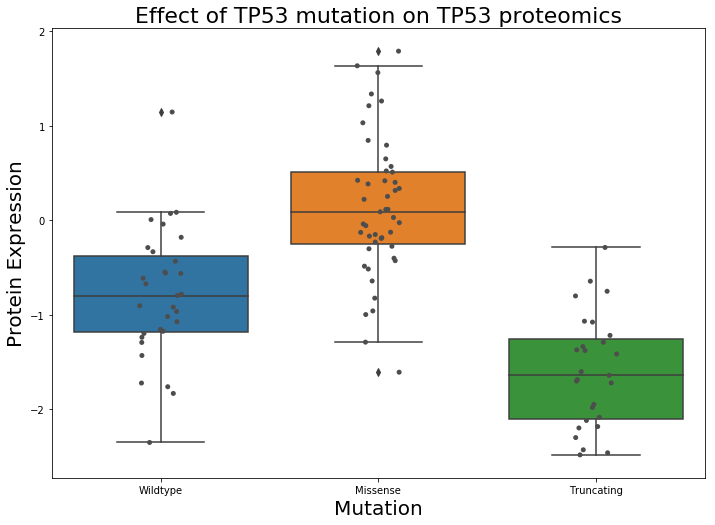

In [31]:
gene = 'TP53'
protein = 'TP53'
# 1.  Merge the mutation status of P53 and the proteomics data of P53
p53_mutations_protein = ov.compare_mutations(proteomics, gene, protein)

# 2. Classify patients into one of 3 categories: wildtype, missense, truncation
p53_mutations_protein = p53_mutations_protein.replace({'Mutation': {'Frame_Shift_Del': 'Truncating',
                                      'Frame_Shift_Ins': 'Truncating',
                                      'Nonsense_Mutation': 'Truncating',
                                      'Splice_Site': 'Truncating',
                                      'Missense_Mutation': 'Missense'}})

# 3.  Make two new DFs, one for people with a mutation, one for all the wildtype cancer patients.
p53_missense = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Missense']
p53_truncating = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Truncating']
p53_mutated = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] != 'Wildtype']
p53_wt = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Wildtype']

# 4. ttest for proteomics of TP53 between wildtype cancer and missense mutation
ttest = scipy.stats.ttest_ind(p53_missense[protein], p53_wt[protein])
print(protein + " proteomics missense mutation vs wildtype: " + str(ttest[1]))

# 4. ttest for proteomics of TP53 between wildtype cancer and truncating mutation
ttest = scipy.stats.ttest_ind(p53_truncating[protein], p53_wt[protein])
print(protein + " proteomics truncating mutation vs wildtype: " + str(ttest[1]))

# 4. ttest for proteomics of TP53 between wildtype cancer and all mutation
ttest = scipy.stats.ttest_ind(p53_mutated[protein], p53_wt[protein])
print(protein + " proteomics all mutation vs wildtype: " + str(ttest[1]))

# 5. Plot the data
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p53_mutations_protein, x = 'Mutation', y = protein, ax = ax, order = ['Wildtype', 'Missense', 'Truncating'])
boxplt = sns.stripplot(data = p53_mutations_protein, x = 'Mutation', y = protein, jitter = True, color = '.3', order = ['Wildtype', 'Missense', 'Truncating'])
boxplt.set_xlabel('Mutation', fontsize='20')
boxplt.set_ylabel('Protein Expression', fontsize='20')
boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics", fontsize='22')
plt.show()

ADH5 proteomics missense mutation vs wildtype: 4.591706232692903e-06
ADH5 proteomics truncating mutation vs wildtype: 0.02785435989645811
ADH5 proteomics all mutation vs wildtype: 3.3454989855391286e-05


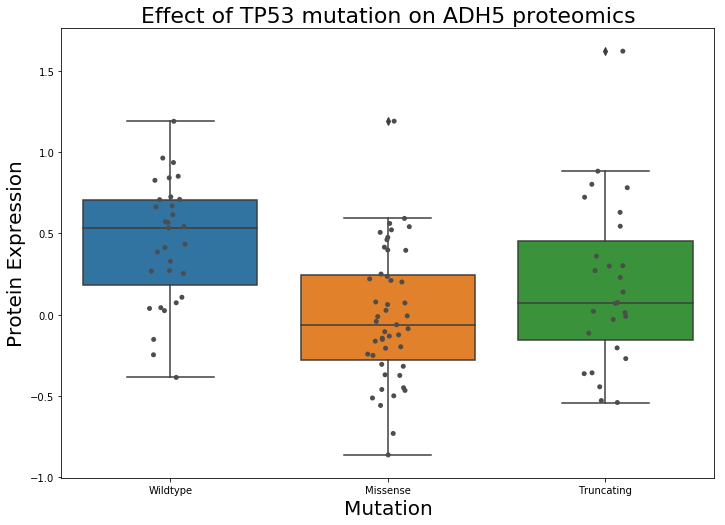

In [110]:
gene = 'TP53'
protein = 'ADH5'
# 1.  Merge the mutation status of P53 and the proteomics data of P53
p53_mutations_protein = ov.compare_mutations(proteomics, protein, gene)

# 2. Classify patients into one of 3 categories: wildtype, missense, truncation
p53_mutations_protein = p53_mutations_protein.replace({'Mutation': {'Frame_Shift_Del': 'Truncating',
                                      'Frame_Shift_Ins': 'Truncating',
                                      'Nonsense_Mutation': 'Truncating',
                                      'Splice_Site': 'Truncating',
                                      'Missense_Mutation': 'Missense'}}).dropna(axis=0)

# 3.  Make two new DFs, one for people with a mutation, one for all the wildtype cancer patients.
p53_missense = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Missense']
p53_truncating = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Truncating']
p53_mutated = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] != 'Wildtype']
p53_wt = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Wildtype']

# 4. ttest for proteomics of TP53 between wildtype cancer and missense mutation
ttest = scipy.stats.ttest_ind(p53_missense[protein], p53_wt[protein])
print(protein + " proteomics missense mutation vs wildtype: " + str(ttest[1]))

# 4. ttest for proteomics of TP53 between wildtype cancer and truncating mutation
ttest = scipy.stats.ttest_ind(p53_truncating[protein], p53_wt[protein])
print(protein + " proteomics truncating mutation vs wildtype: " + str(ttest[1]))

# 4. ttest for proteomics of TP53 between wildtype cancer and all mutation
ttest = scipy.stats.ttest_ind(p53_mutated[protein], p53_wt[protein])
print(protein + " proteomics all mutation vs wildtype: " + str(ttest[1]))

# 5. Plot the data
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p53_mutations_protein, x = 'Mutation', y = protein, ax = ax, order = ['Wildtype', 'Missense', 'Truncating'])
boxplt = sns.stripplot(data = p53_mutations_protein, x = 'Mutation', y = protein, jitter = True, color = '.3', order = ['Wildtype', 'Missense', 'Truncating'])
boxplt.set_xlabel('Mutation', fontsize='20')
boxplt.set_ylabel('Protein Expression', fontsize='20')
boxplt.set_title("Effect of " + gene + " mutation on " + protein + " proteomics", fontsize='22')
plt.show()

## All mutations vs. cancer wildtype

In [107]:
significant_all_mut_wt = {}
# Bonferroni correction of p-value significance cutoff to account for multiple hypothesis testing
pcutoff = 0.05 / len(proteomics.columns)

# Go through every protein in our proteomics dataframe
for protein in proteomics.columns:
    if (protein != 'patient_key'):
        # Create dataframe with mutation status of TP53 with proteomics of the given protein
        p53_mutations_protein = ov.compare_mutations(proteomics, protein, gene).dropna(axis = 0)
        # Perform the ttest if there is enough data for that protein
        mutated_tp53 = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] != 'Wildtype']
        wt_tp53 = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Wildtype']
        if len(mutated_tp53) < 2: continue
        if len(wt_tp53) < 2: continue
        ttest = scipy.stats.ttest_ind(mutated_tp53[protein], wt_tp53[protein])
        # Print significant values
        if(len(p53_mutations_protein.columns) > 3):
            if ttest[1][1] <= pcutoff:
                significant_all_mut_wt[protein] = ttest[1]  
        else:
            if ttest[1] <= pcutoff:
                significant_all_mut_wt[protein] = ttest[1]
            
significant_all_mut_wt

{'AGT': 1.7789346374868616e-06,
 'ASPA': 1.1267617262642094e-08,
 'BCHE': 3.7485125530254065e-11,
 'BTD': 1.0263196670049749e-07,
 'DDB2': 1.4842827885718476e-08,
 'EPB42': 2.053663195273451e-07,
 'F13A1': 1.6788286890656644e-06,
 'GALT': 1.5381552690481827e-09,
 'SERPIND1': 5.626927747645359e-07,
 'ITGA6': array([1.68228069e-06, 1.57735194e-06]),
 'LCAT': 6.730499772199816e-09,
 'SGCB': 8.854363235128135e-07,
 'MAOA': 7.909521350456247e-07,
 'NME1': 4.667455834980026e-09,
 'PGK1': 9.717299608859717e-07,
 'PROC': 1.9831086759215955e-06,
 'SGCD': 6.702588599995614e-07,
 'SERPINA7': 6.585189473000617e-08,
 'TIMP3': 7.86473896658748e-09,
 'TPM1': array([1.15667123e-06, 5.43507816e-07, 1.85340769e-08, 9.21479860e-09]),
 'LAMA2': 2.8200240659188093e-10,
 'PECAM1': 3.606213986406801e-07,
 'ALB': 2.0370306525332762e-06,
 'APOA4': 3.5395356568925744e-06,
 'COL4A5': 2.6372091491818194e-06,
 'ELN': array([1.53193681e-06, 1.69316808e-06, 8.50602718e-07]),
 'F10': 3.2971953024075e-06,
 'MPZ': 1.14

## Missense mutations vs. cancer wildtype

In [104]:
significant_missense_wt = {}
# Bonferroni correction of p-value significance cutoff to account for multiple hypothesis testing
pcutoff = 0.05 / len(proteomics.columns)

# Go through every protein in our proteomics dataframe
for protein in proteomics.columns:
    if (protein != 'patient_key'):
        # Create dataframe with mutation status of TP53 with proteomics of the given protein
        p53_mutations_protein = ov.compare_mutations(proteomics, protein, gene).dropna(axis = 0)
        # Some proteins have duplicate measurements; create a new dataframe with the mean of these measurements
        if len(p53_mutations_protein.columns) > 3:
            prot_data = p53_mutations_protein[protein]
            prot_data[protein+'_mean'] = prot_data.mean(axis=1)
            newdf = pd.DataFrame()
            newdf['Mutation'] = p53_mutations_protein['Mutation']
            newdf[protein] = prot_data[protein+'_mean']
            p53_mutations_protein = newdf
        # Classify mutations into missense, truncating, wildtype
        p53_mutations_protein = p53_mutations_protein.replace({'Mutation': {'Frame_Shift_Del': 'Truncating',
                                      'Frame_Shift_Ins': 'Truncating',
                                      'Nonsense_Mutation': 'Truncating',
                                      'Splice_Site': 'Truncating',
                                      'Missense_Mutation': 'Missense'}})
        # Perform the ttest if there is enough data for that protein
        mutated_tp53 = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Missense']
        wt_tp53 = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Wildtype']
        if len(mutated_tp53) < 2: continue
        if len(wt_tp53) < 2: continue
        ttest = scipy.stats.ttest_ind(mutated_tp53[protein], wt_tp53[protein])
        # Print significant values
        if ttest[1] <= pcutoff:
            significant_missense_wt[protein] = ttest[1]
            
significant_missense_wt

{'ASPA': 3.7173760243171395e-07,
 'BCHE': 7.962566501451592e-08,
 'BTD': 2.6736453996936905e-06,
 'DDB2': 3.4568603277033647e-07,
 'GALT': 3.813527601797108e-07,
 'ITGA6': 5.177495398467907e-07,
 'LCAT': 2.300698744930265e-06,
 'MAOA': 3.635291804572175e-06,
 'NME1': 3.261867952336961e-07,
 'SMN1': 4.469713708642181e-06,
 'TIMP3': 7.842341375571573e-07,
 'LAMA2': 6.937323517485648e-08,
 'TP53': 3.4378735570965783e-07,
 'ADH5': 4.591706232692903e-06,
 'ALDH1A1': 5.693576104362483e-08,
 'ACE': 2.993658227853736e-06,
 'MAOB': 1.403063377040032e-07,
 'PLCB3': 7.098657826577429e-09,
 'RPL4': 2.658476959551383e-06,
 'RPL7': 7.820667428010048e-11,
 'RPL11': 2.3202643308605405e-08,
 'RPL18': 2.1997138952295832e-08,
 'RPL37': 4.941254113232027e-07,
 'RPLP0': 3.474123752117268e-06,
 'RPLP2': 7.70784421057606e-08,
 'RPS4X': 6.125248264367139e-07,
 'RPS5': 6.811273360665475e-09,
 'TOMM5': 5.810810365798772e-08,
 'HNRNPD': 1.2560086422722645e-06,
 'CHD3': 1.413838622535353e-06,
 'RPS11': 4.31626800

In [108]:
only_missense = {k:v for k,v in significant_missense_wt.items() if k not in significant_all_mut_wt}
only_missense

{'SMN1': 4.469713708642181e-06,
 'TP53': 3.4378735570965783e-07,
 'ADH5': 4.591706232692903e-06,
 'DST': 1.0533664684196617e-06,
 'CLINT1': 3.828815141597257e-06,
 'FKBP4': 3.0214102927684914e-06,
 'PDIA4': 2.09151037100321e-06,
 'MANF': 3.5684001112669256e-06,
 'PPP2R5A': 1.7166140483560509e-06,
 'DIAPH2': 2.246434748499047e-06,
 'STRAP': 1.8679088227578254e-07,
 'DDX20': 1.557488054358106e-06,
 'XRN2': 1.5233137786412131e-06}

## Missense mutations vs. truncating mutations

In [112]:
significant_missense_truncating = {}
# Bonferroni correction of p-value significance cutoff to account for multiple hypothesis testing
pcutoff = 0.05 / len(proteomics.columns)

# Go through every protein in our proteomics dataframe
for protein in proteomics.columns:
    if (protein != 'patient_key'):
        # Create dataframe with mutation status of TP53 with proteomics of the given protein
        p53_mutations_protein = ov.compare_mutations(proteomics, protein, gene).dropna(axis = 0)
        # Some proteins have duplicate measurements; create a new dataframe with the mean of these measurements
        if len(p53_mutations_protein.columns) > 3:
            prot_data = p53_mutations_protein[protein]
            prot_data[protein+'_mean'] = prot_data.mean(axis=1)
            newdf = pd.DataFrame()
            newdf['Mutation'] = p53_mutations_protein['Mutation']
            newdf[protein] = prot_data[protein+'_mean']
            p53_mutations_protein = newdf
        # Classify mutations into missense, truncating, wildtype
        p53_mutations_protein = p53_mutations_protein.replace({'Mutation': {'Frame_Shift_Del': 'Truncating',
                                      'Frame_Shift_Ins': 'Truncating',
                                      'Nonsense_Mutation': 'Truncating',
                                      'Splice_Site': 'Truncating',
                                      'Missense_Mutation': 'Missense'}})
        # Perform the ttest if there is enough data for that protein
        mutated_tp53 = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Missense']
        wt_tp53 = p53_mutations_protein.loc[p53_mutations_protein['Mutation'] == 'Truncating']
        if len(mutated_tp53) < 2: continue
        if len(wt_tp53) < 2: continue
        ttest = scipy.stats.ttest_ind(mutated_tp53[protein], wt_tp53[protein])
        # Print significant values
        if ttest[1] <= pcutoff:
            significant_missense_truncating[protein] = ttest[1]
            
significant_missense_truncating

{'TP53': 5.023711174709319e-16}